# Завдання

Протестуйте описані в лекції методи і моделі на датасеті AirPassenger, що міститься на GitHub в папці лекції та містить дані про коливання кількості пасажирів авіаліній із часом. Порівняйте метрики оцінки моделі для двох датасетів.

# Розв'язок

In [39]:
import pandas as pd
import matplotlib
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [10]:
series = pd.read_csv('AirPassengers.csv')
series.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


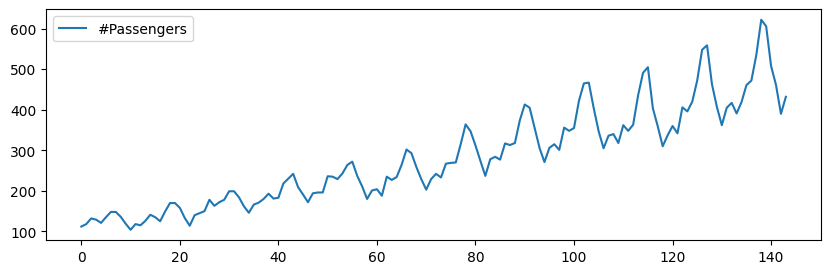

In [11]:
matplotlib.rcParams['figure.figsize'] = [10, 3]
series.plot()
pyplot.show()

In [18]:
acf_value = acf(series['#Passengers'])
pacf_value = pacf(series['#Passengers'], nlags = 3)

In [19]:
acf_value

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

In [20]:
pacf_value

array([ 1.        ,  0.95467704, -0.26527732,  0.05546955])

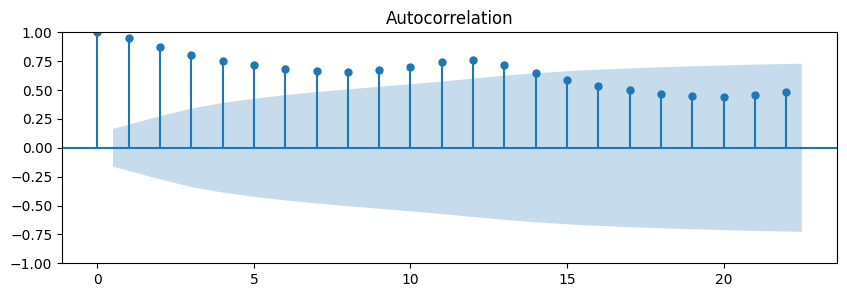

In [21]:
matplotlib.rcParams['figure.figsize'] = [10, 3]
plot_acf(series['#Passengers'])
pyplot.show()

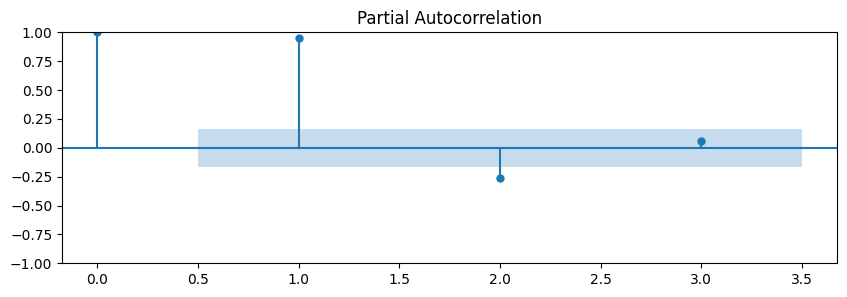

In [26]:
plot_pacf(series['#Passengers'], lags =3)
pyplot.show()

In [28]:
print(series['#Passengers'])

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64


### Модель ARIMA

In [29]:
import statsmodels.api as sa

In [31]:
src_data_model = series['#Passengers'][:115]
model = sa.tsa.ARIMA(src_data_model).fit()

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  115
Model:                          ARIMA   Log Likelihood                -681.863
Date:                Sun, 19 Mar 2023   AIC                           1367.727
Time:                        16:00:47   BIC                           1373.216
Sample:                    01-01-1949   HQIC                          1369.955
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        239.9478      9.613     24.960      0.000     221.106     258.789
sigma2      8271.3245   1363.556      6.066      0.000    5598.803    1.09e+04
===================================================================================
Ljung-Box (L1) (Q):                  98.78   Jarque-Bera (JB):                 7.59
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               1.57   Skew:                             0.60
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
pred_arima = model.predict(115, 143, typ='levels')

<Axes: xlabel='Month'>

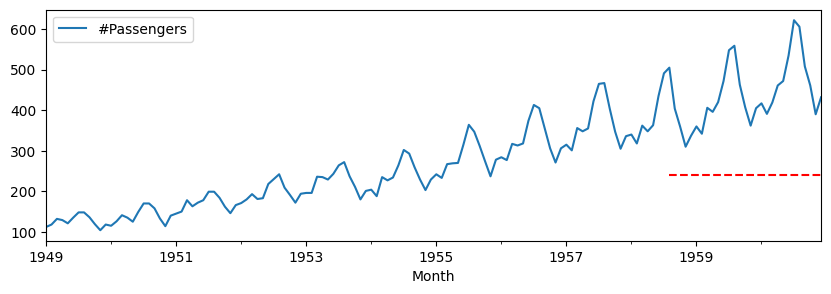

In [44]:
series.plot()
pred_arima.plot(style='r--')

### Модель SARIMAX

In [45]:
model = sa.tsa.statespace.SARIMAX(src_data_model, seasonal_order=(2,2,2,12)).fit()

In [46]:
pred_sarimax = model.predict(115, 143, typ='levels')

<Axes: xlabel='Month'>

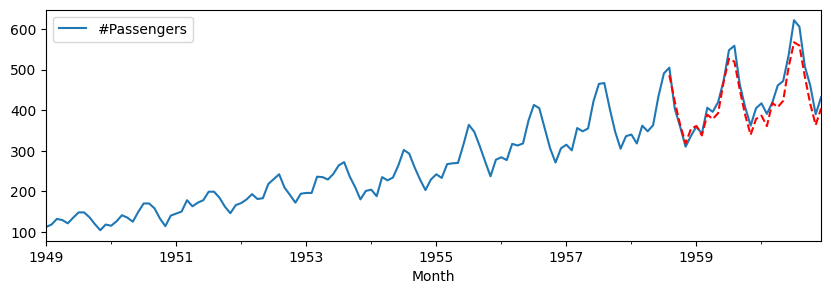

In [48]:
series.plot()
pred_sarimax.plot(style='r--')

In [49]:
#бібліотеку ml_metrics встановити вдалось, але при імпорті виникає помилка, тому застосовано іншу метрику
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [66]:
data = series['#Passengers'][115:]
print("RMSE_ARIMA = ", mean_squared_error(data, pred_arima, squared=False), "MAE_ARIMA = ", mean_absolute_error(data, pred_arima))
print("RMSE_SARIMAX = ", mean_squared_error(data, pred_sarimax, squared=False), "MAE_SARIMAX = ", mean_absolute_error(data, pred_sarimax))

RMSE_ARIMA =  215.05727316716278 MAE_ARIMA =  200.36252356444086
RMSE_SARIMAX =  28.350901124170974 MAE_SARIMAX =  24.00262056599703


Відповідні показники метрики з датасету "temperature": 

RMSE_ARIMA =  4.120452128851834; MAE_ARIMA = 3.400300714329499

RMSE_SARIMAX =  4.137580702241105; MAE_SARIMAX = 3.408909214301457

**Таким чином, враховуючи отримані показники метрики, для прогнозування часового ряду з датасету "AirPassengers" значно більш прийнятною є модель SARIMAX, яка враховує низку важливих в даному випадку факторів, зокрема - сезонність. У той же час, порівняння метрик побудованих моделей за даними з датасетів "temperature" та "AirPassengers" не є коректним, адже розмірності досліджуваних даних суттєво різняться.**